In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset-elarged-with-smote/iris_synthetic_data.csv


## Loading and checking the data

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/iris-dataset-elarged-with-smote/iris_synthetic_data.csv')

In [3]:
# Preview the dataset
data.head(10)

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa
5,5.1,3.7,1.5,0.4,Iris-setosa
6,5.2,3.7,1.5,0.3,Iris-setosa
7,5.4,3.4,1.6,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.2,3.7,1.5,0.3,Iris-setosa


In [4]:
# Size of the dataset
data.shape

(3000, 5)

In [5]:
# Data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  3000 non-null   float64
 1   sepal width   3000 non-null   float64
 2   petal length  3000 non-null   float64
 3   petal width   3000 non-null   float64
 4   label         3000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 117.3+ KB


In [6]:
# Getting basic statistics
data.describe()

,sepal length,sepal width,petal length,petal width
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,5.865267,3.051833,3.767367,1.191000
std,0.805073,0.412472,1.751183,0.758022
min,4.300000,2.000000,0.900000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.200000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# getting the list of columns
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'label'], dtype='object')

In [8]:
# getting dtype of each column
data.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
label            object
dtype: object

## Data preprocessing

### Checking and Handling missing values

In [9]:
# Checking for missing values
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
label           0
dtype: int64

**Note**: *No missing data*

### Checking for outliers

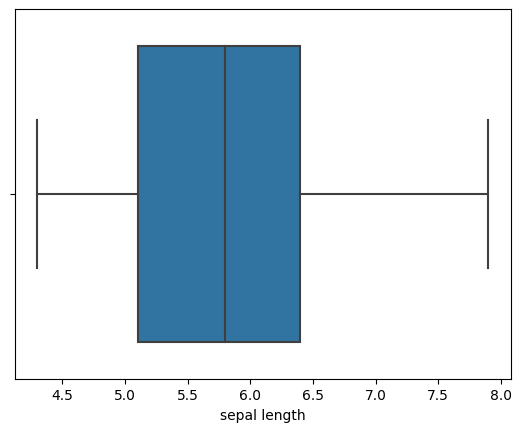

In [10]:
# checking for outlier
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['sepal length'])
plt.show()

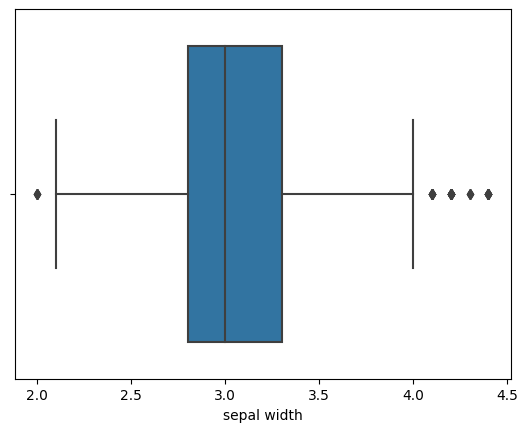

In [11]:
# checking for outlier
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['sepal width'])
plt.show()

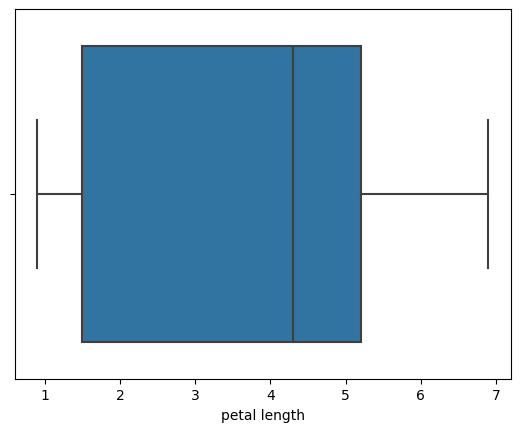

In [12]:
# checking for outlier
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['petal length'])
plt.show()


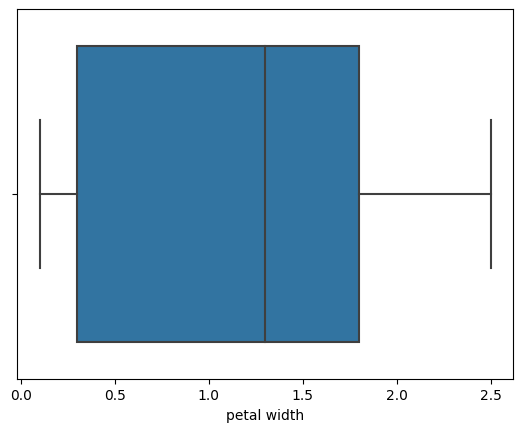

In [13]:
# checking for outlier
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['petal width'])
plt.show()

## Exploaratory Data Analysis

In [14]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

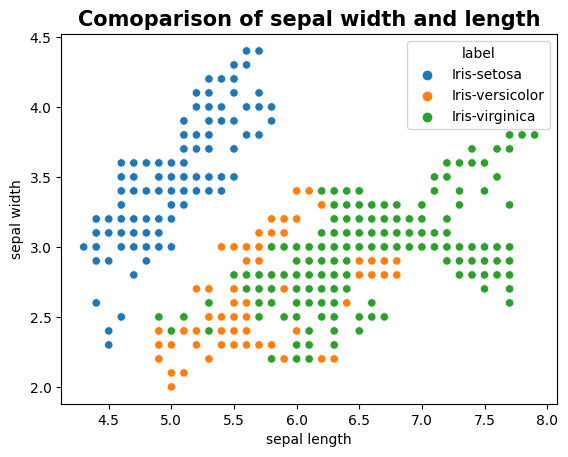

In [15]:
sns.scatterplot(x=data['sepal length'], y=data['sepal width'], hue=data['label'])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Comoparison of sepal width and length", fontsize=15, fontweight="bold")
plt.show()

*There is a clear clustering of data that can be seen here except for some outlier between iris versicolor and iris virginica*

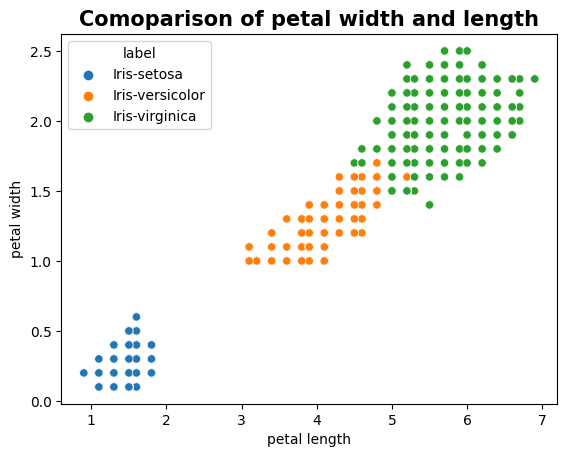

In [16]:
sns.scatterplot(x=data['petal length'], y=data['petal width'], hue=data['label'])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("Comoparison of petal width and length", fontsize=15, fontweight="bold")
plt.show()

*Once again another clear clustering of data can be seen*

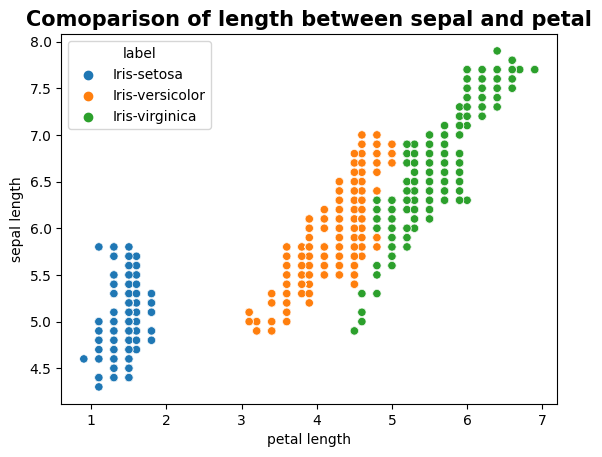

In [17]:
sns.scatterplot(x=data['petal length'], y=data['sepal length'], hue=data['label'])
plt.ylabel("sepal length")
plt.xlabel("petal length")
plt.title("Comoparison of length between sepal and petal", fontsize=15, fontweight="bold")
plt.show()

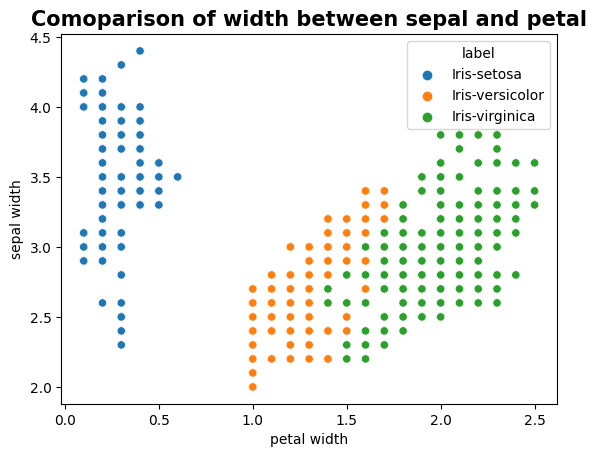

In [18]:
sns.scatterplot(x=data['petal width'], y=data['sepal width'], hue=data['label'])
plt.ylabel("sepal width")
plt.xlabel("petal width")
plt.title("Comoparison of width between sepal and petal", fontsize=15, fontweight="bold")
plt.show()

## Data preparation for Modelling

### One hot encoding

In [21]:
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['encoded_label'] = data['label'].map(label_mapping)

### Splitting into train and test data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = data.drop(columns=['label','encoded_label'])
y = data['encoded_label']

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Modelling

### K means clustering - Baseline model

In [33]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Scaling the data (optional but helps in clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Predict cluster labels
labels = kmeans.predict(X_scaled)

# Add the cluster labels to the original dataset
X['cluster'] = labels

# Evaluate the clustering performance using Silhouette Score
score = silhouette_score(X_scaled, labels)

print("Clustering Labels:\n", labels)
print(f"Silhouette Score: {score}")

Clustering Labels:
 [0 0 0 ... 1 1 1]
Silhouette Score: 0.5849232887956425


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Neural network model

In [34]:
import tensorflow as tf

In [60]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1),
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

model_1.fit(X, y, epochs=100, verbose=0)

In [61]:
model_1.evaluate(X,y)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9317 - loss: -1.0895   


[-5.314127445220947, 0.6666666865348816]

**We are able to build a neural network model 93% accuracy**